In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [4]:
df = pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [10]:
X = df.drop(columns=['Car_Name','Selling_Price'], axis=1 )

In [11]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,Petrol,Dealer,Manual,0
1,2013,9.54,43000,Diesel,Dealer,Manual,0
2,2017,9.85,6900,Petrol,Dealer,Manual,0
3,2011,4.15,5200,Petrol,Dealer,Manual,0
4,2014,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,Diesel,Dealer,Manual,0
297,2015,5.90,60000,Petrol,Dealer,Manual,0
298,2009,11.00,87934,Petrol,Dealer,Manual,0
299,2017,12.50,9000,Diesel,Dealer,Manual,0


In [12]:
Y = df['Selling_Price']

In [13]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [14]:
X['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [15]:
# Diesel: 0
# Petrol: 1
# CNG: 2

X.replace({'Fuel_Type': {'Diesel':0,'Petrol':1, 'CNG':2}},inplace=True)

In [16]:
X['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [18]:
# Dealer: 0
# Individual: 1


X.replace({'Seller_Type': {'Dealer':0,'Individual':1}},inplace=True)

In [19]:
X['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [20]:
# Manual: 0
# Automatic: 1


X.replace({'Transmission': {'Manual':0,'Automatic':1}},inplace=True)

In [21]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,1,0,0,0
1,2013,9.54,43000,0,0,0,0
2,2017,9.85,6900,1,0,0,0
3,2011,4.15,5200,1,0,0,0
4,2014,6.87,42450,0,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,0,0,0
297,2015,5.90,60000,1,0,0,0
298,2009,11.00,87934,1,0,0,0
299,2017,12.50,9000,0,0,0,0


In [62]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

In [63]:
model = LinearRegression()

In [64]:
model.fit(X,Y)

LinearRegression()

In [65]:
trainning_data_prediction = model.predict(X_train)

In [66]:
# R squared error
score_1 = metrics.r2_score(Y_train, trainning_data_prediction)

print('R squared error: ', score_1)

R squared error:  0.8815749734699211


In [67]:
test_data_prediction = model.predict(X_test)

In [68]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

print('R squared error: ', score_1)

R squared error:  0.8839647821512407


In [69]:
# Mean absolute error for trainning
score_2 = metrics.mean_absolute_error(Y_train, trainning_data_prediction)

print(' Mean absolute error: ', score_2)

 Mean absolute error:  1.2296203359366928


In [70]:
# Mean absolute error for test
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print(' Mean absolute error: ', score_2)

 Mean absolute error:  1.053110928273813


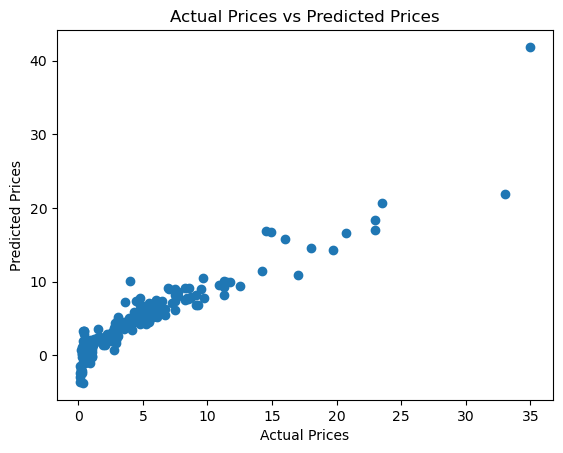

In [72]:
# trainning

plt.scatter(Y_train, trainning_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

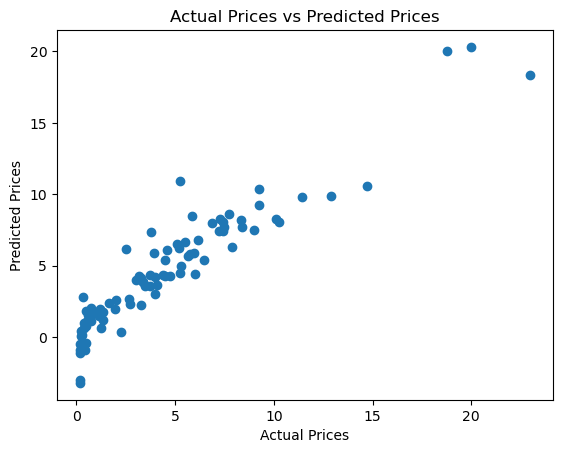

In [73]:
# test

plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()